In [1]:
try:
    import matplotlib
    matplotlib.use('qt5agg')
    import matplotlib.pyplot as plt
    from matplotlib import cm
    from mpl_toolkits.mplot3d import Axes3D
except ImportError:
    print("matplotlib is not installed")

In [ ]:
# if failed: uncomment, run and try to run again previous cell
# import sys
# !conda install --yes --prefix {sys.prefix} matplotlib

In [2]:
try:
    import numpy as np
except ImportError:
    print("numpy is not installed")

In [ ]:
# if failed: uncomment, run and try to run again previous cell
# import sys
# !conda install --yes --prefix {sys.prefix} numpy

#### Read data into numpy array

In [3]:
# Read data into numpy array
# import numpy as np
data_file = 'spectrum/108_DATA.EDE'
with open(data_file, "rb") as f:
    data = np.fromfile(f, dtype=np.uint16)

data = data.reshape(256,256)

#### Check data bounds

In [4]:
print("min: {}\tmax: {}".format(np.min(data), np.max(data)))

min: 0	max: 52


#### Plot 3D surface

<IPython.core.display.Javascript object>


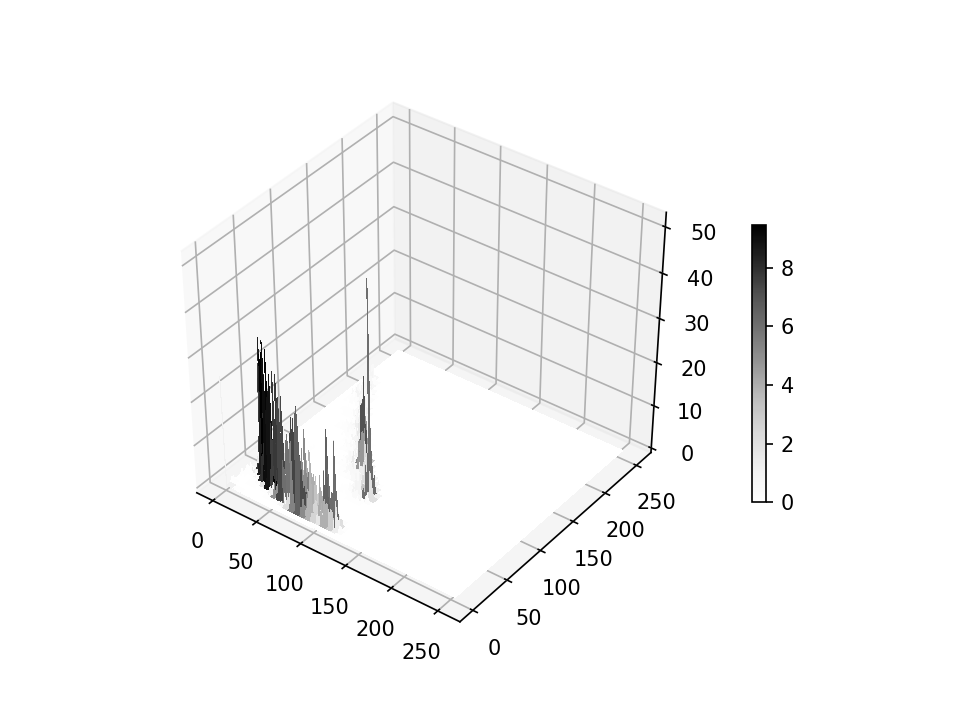

In [5]:
%matplotlib notebook
#calling it a second time may prevent some graphics errors
%matplotlib notebook

# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm

n,m = data.shape
x,y = np.ogrid[0:n, 0:m]

# fig = plt.figure(figsize=(13,7))
fig = plt.figure(dpi=150)
ax = fig.gca(projection='3d')

# Plot the surface.
# surf = ax.plot_surface(y, x, data, cmap=cm.coolwarm, linewidth=0, antialiased=False)
surf = ax.plot_surface(y, x, data, cmap='Greys', linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5)

# Customize the view angle so it's easier to see that the scatter points lie on the plane y=0
ax.view_init(elev=50., azim=-100.)

#### Plot colormesh to locate spatial position of clusters

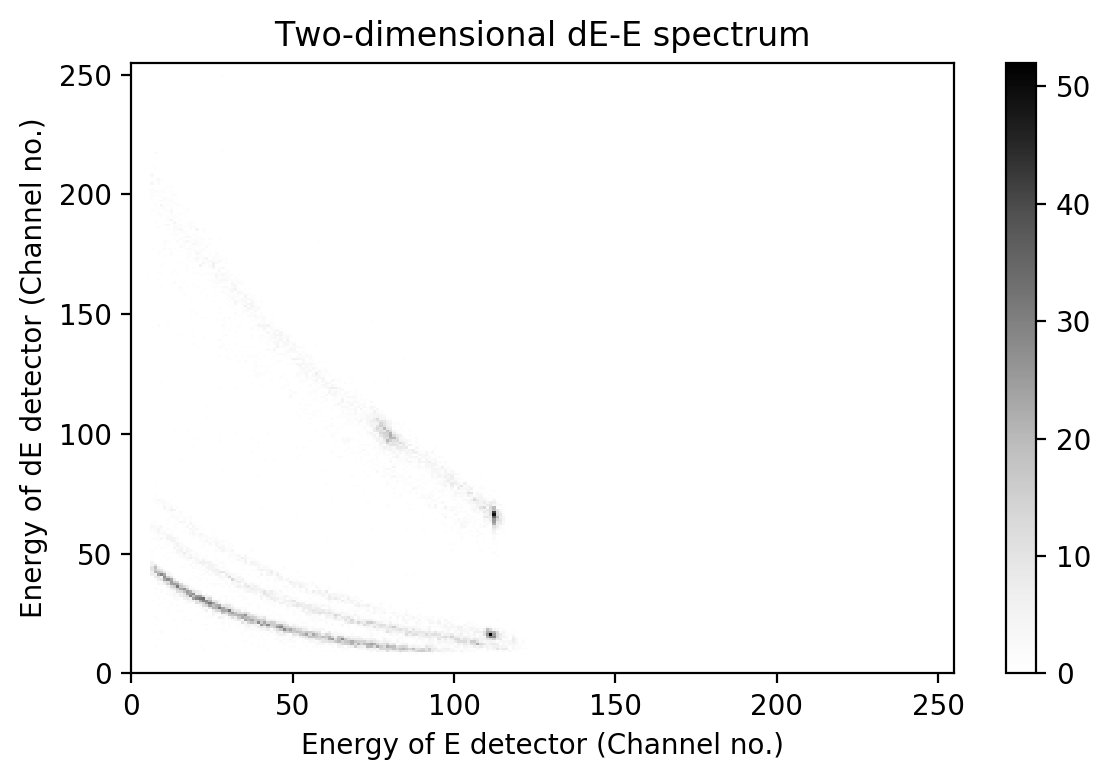

In [6]:
%matplotlib inline

# Plot colormap
e = np.arange(256)

#figsize=(10,7)
fig, ax = plt.subplots(dpi=200)
# c = ax.pcolormesh(e,e,data, cmap='Spectral_r')
c = ax.pcolormesh(e,e,data, cmap='Greys')
ax.set_title(r'Two-dimensional dE-E spectrum')
ax.set_xlabel(r'Energy of E detector (Channel no.)')
ax.set_ylabel(r'Energy of dE detector (Channel no.)')
fig.colorbar(c, ax=ax)

fig.tight_layout()
plt.show()
plt.close()

### Plot X and Y projections of our EdE spectra data

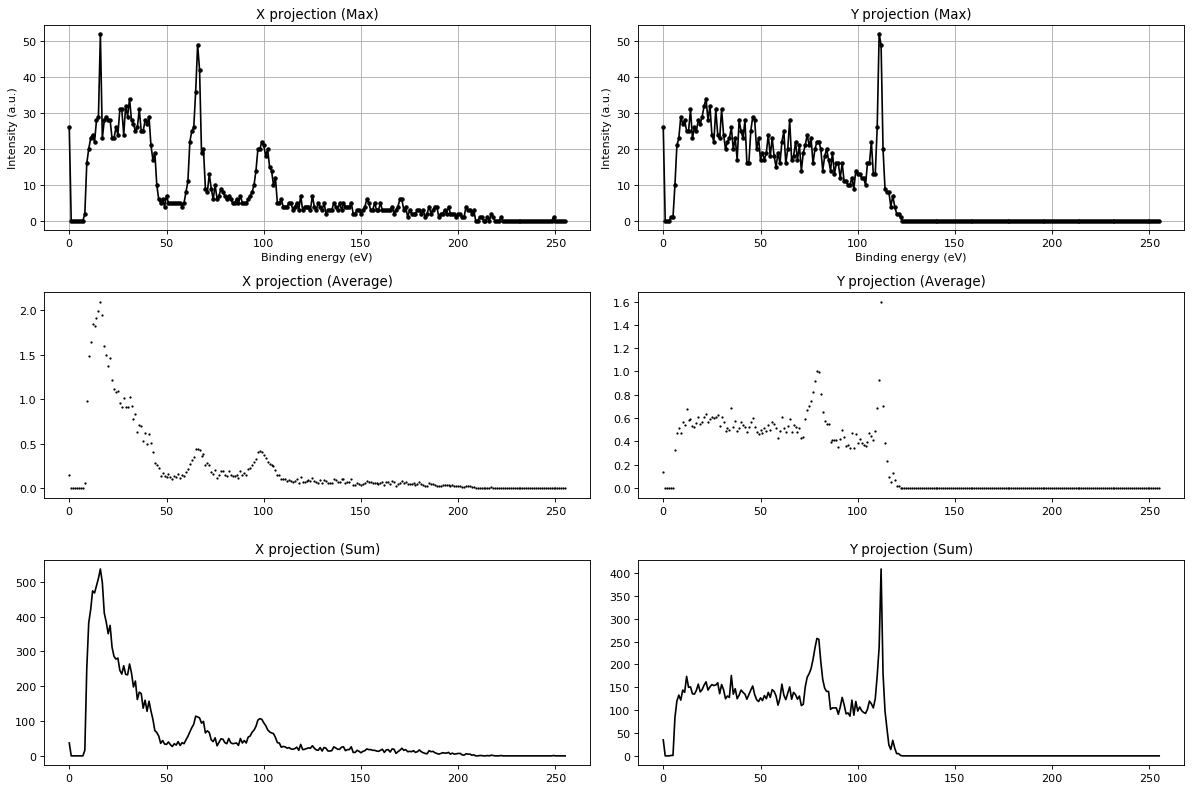

In [7]:
%matplotlib inline

# Data for plotting
e = np.arange(256)
y1 = np.amax(data, axis=1)
y2 = np.amax(data, axis=0)

fig, ((ax11, ax12), (ax21, ax22), (ax31, ax32)) = plt.subplots(3, 2, figsize=(15,10), dpi=80)
ax11.plot(e, y1, 'k.-')
ax11.set_title('X projection (Max)')
ax11.set_xlabel('Binding energy (eV)')
ax11.set_ylabel('Intensity (a.u.)')
ax11.grid()

ax21.scatter(e, np.average(data, axis=1), s=1., c='k')
ax21.set_title('X projection (Average)')

ax31.plot(e, np.sum(data, axis=1), 'k')
ax31.set_title('X projection (Sum)')

ax12.plot(e, y2, 'k.-')
ax12.set_xlabel('Binding energy (eV)')
ax12.set_title('Y projection (Max)')
ax12.set_ylabel('Intensity (a.u.)')
ax12.grid()

# ax22.scatter(e, y2, s=1.)
# ax22.stem(e, y2, linefmt=':', markerfmt='c', basefmt='None', use_line_collection=True)
ax22.scatter(e, np.average(data, axis=0), s=1., c='k')
ax22.set_title('Y projection (Average)')

ax32.plot(e, np.sum(data, axis=0), 'k')
ax32.set_title('Y projection (Sum)')

fig.tight_layout()
plt.show()

#### Load masks for each of the roi

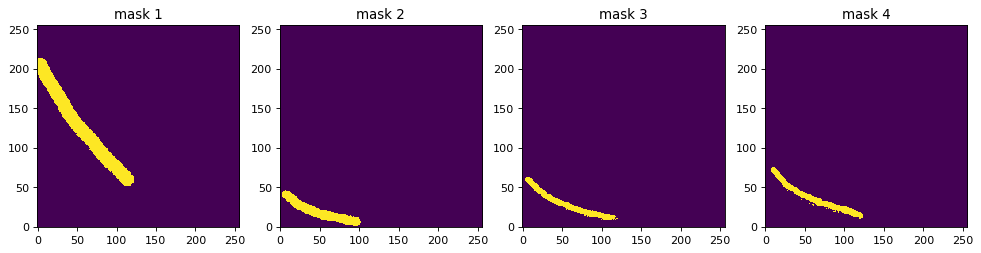

In [8]:
from PIL import Image

masks = []
for i in range(1,5):
    im = Image.open(f"processing/data-{i}.png")
    p = np.array(im).astype('bool')
    p = np.flipud(p)
    masks.append(p)


# Draw masks
%matplotlib inline

fig, (ax11, ax12, ax13, ax14) = plt.subplots(1, 4, figsize=(15,5), dpi=80)
ax11.imshow(masks[0], origin='lower')
ax11.set_title(r'mask 1')
ax12.imshow(masks[1], origin='lower')
ax12.set_title(r'mask 2')
ax13.imshow(masks[2], origin='lower')
ax13.set_title(r'mask 3')
ax14.imshow(masks[3], origin='lower')
ax14.set_title(r'mask 4')
plt.show()
plt.close()

#### Apply masks to data

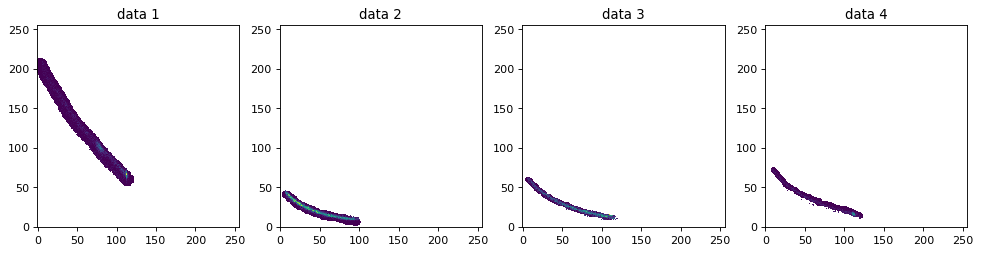

In [9]:
data1 = np.ma.masked_array(data, 1-masks[0])
data2 = np.ma.masked_array(data, 1-masks[1])
data3 = np.ma.masked_array(data, 1-masks[2])
data4 = np.ma.masked_array(data, 1-masks[3])

# Draw masked data
%matplotlib inline

fig, (ax11, ax12, ax13, ax14) = plt.subplots(1, 4, figsize=(15,5), dpi=80)
ax11.imshow(data1, origin='lower')
ax11.set_title(r'data 1')
ax12.imshow(data2, origin='lower')
ax12.set_title(r'data 2')
ax13.imshow(data3, origin='lower')
ax13.set_title(r'data 3')
ax14.imshow(data4, origin='lower')
ax14.set_title(r'data 4')
plt.show()
plt.close()

### Plot X and Y projections of our RoIs

Data 1


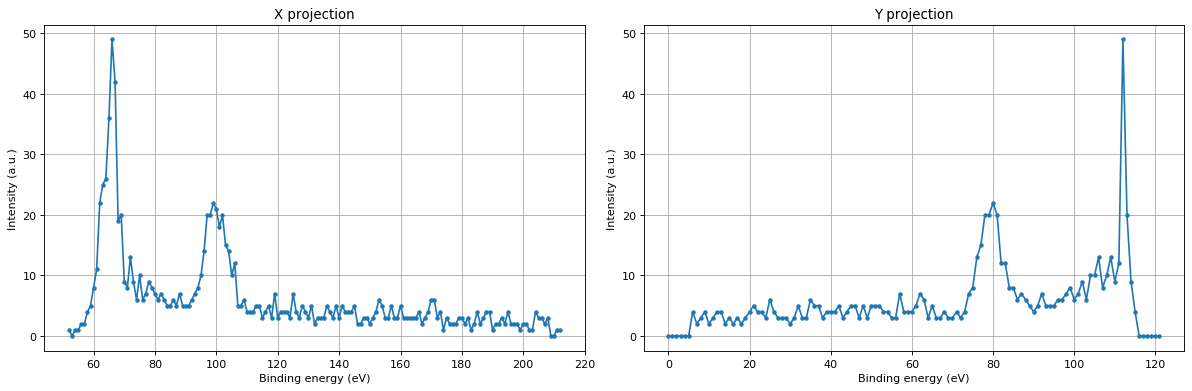

Data 2


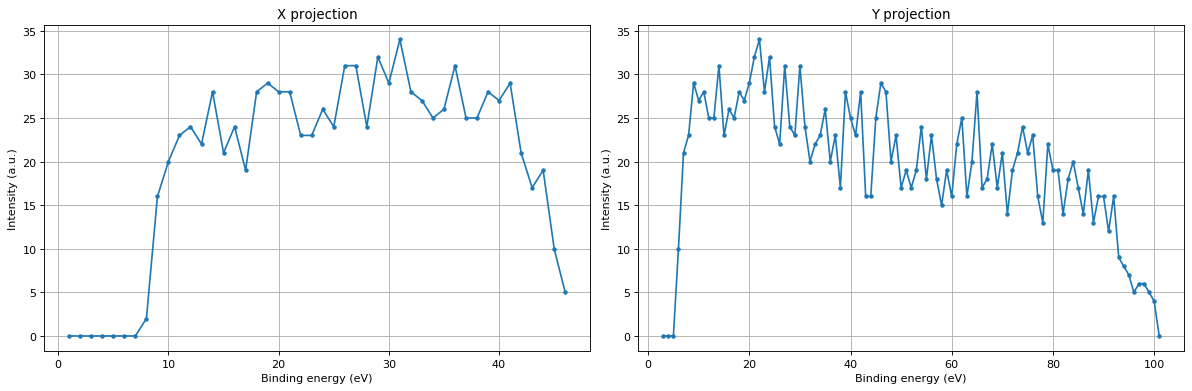

Data 3


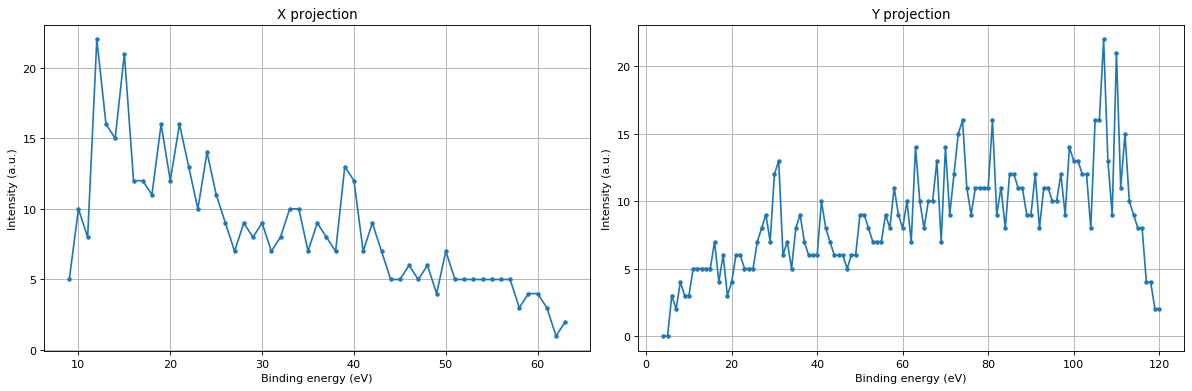

Data 4


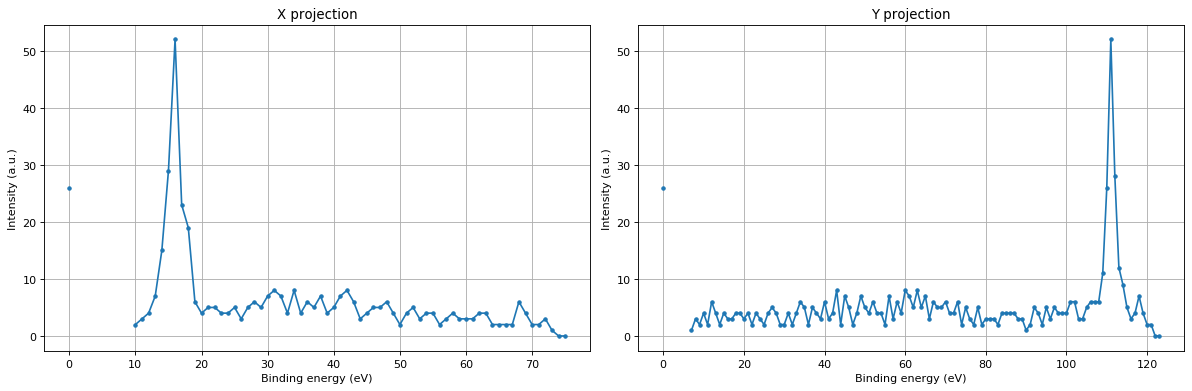

In [10]:
%matplotlib inline

# Plot ROI
def plot_data(data0: np.array):
    e_roi = np.arange(256)
    y1_roi = np.amax(data0, axis=1)
    y2_roi = np.amax(data0, axis=0)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), dpi=80)
    ax1.plot(e_roi, y1_roi, '.-')
    ax1.set_title('X projection')
    ax1.set_xlabel('Binding energy (eV)')
    ax1.set_ylabel('Intensity (a.u.)')
    ax1.grid()

    ax2.plot(e_roi, y2_roi, '.-')
    ax2.set_xlabel('Binding energy (eV)')
    ax2.set_title('Y projection')
    ax2.set_ylabel('Intensity (a.u.)')
    ax2.grid()

    fig.tight_layout()
    plt.show()
    plt.close()

print("Data 1")
plot_data(data1)
print("Data 2")
plot_data(data2)
print("Data 3")
plot_data(data3)
print("Data 4")
plot_data(data4)

### Plot accumulated chart

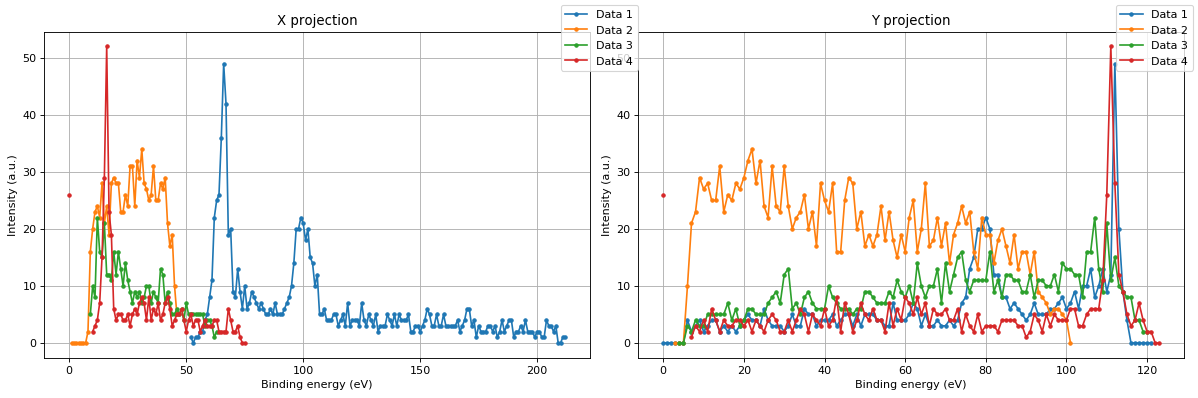

In [11]:
%matplotlib inline

def get_data(data0: np.array):
    e_roi = np.arange(256)
    y1_roi = np.amax(data0, axis=1)
    y2_roi = np.amax(data0, axis=0)
    return e_roi, y1_roi, y2_roi

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), dpi=80)
ax1.set_title('X projection')
ax1.set_xlabel('Binding energy (eV)')
ax1.set_ylabel('Intensity (a.u.)')
ax1.grid()

ax2.set_xlabel('Binding energy (eV)')
ax2.set_title('Y projection')
ax2.set_ylabel('Intensity (a.u.)')
ax2.grid()

e_roi, y1_roi, y2_roi = get_data(data1)
l1px, = ax1.plot(e_roi, y1_roi, '.-', label='Data 1')
l1py, = ax2.plot(e_roi, y2_roi, '.-', label='Data 1')

e_roi, y1_roi, y2_roi = get_data(data2)
l2px, = ax1.plot(e_roi, y1_roi, '.-', label='Data 2')
l2py, = ax2.plot(e_roi, y2_roi, '.-', label='Data 2')

e_roi, y1_roi, y2_roi = get_data(data3)
l3px, = ax1.plot(e_roi, y1_roi, '.-', label='Data 3')
l3py, = ax2.plot(e_roi, y2_roi, '.-', label='Data 3')

e_roi, y1_roi, y2_roi = get_data(data4)
l4px, = ax1.plot(e_roi, y1_roi, '.-', label='Data 4')
l4py, = ax2.plot(e_roi, y2_roi, '.-', label='Data 4')

fig.legend((l1px, l2px, l3px, l4px), ('Data 1', 'Data 2', 'Data 3', 'Data 4'), 'upper center')
fig.legend((l1py, l2py, l3py, l4py), ('Data 1', 'Data 2', 'Data 3', 'Data 4'), 'upper right')

fig.tight_layout()
plt.show()
plt.close()